# Chapter 18: Reinforcement Learning

In [21]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make("CartPole-v1")
obs = env.reset()
obs

array([-0.01721894, -0.00795221,  0.03114766,  0.01525482])

In [3]:
# gym.envs.registry.all()

In [7]:
env.render()

True

In [6]:
env.action_space

Discrete(2)

In [11]:
action = 1
obs, reward, done, info = env.step(action)
print(obs, reward, done, info)

[-0.01364379  0.3813688   0.02610395 -0.55003913] 1.0 False {}


In [12]:
env.render()

True

In [13]:
env.close()

In [14]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

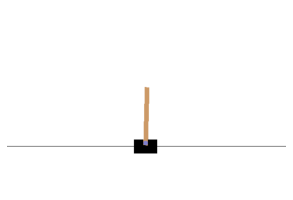

In [18]:
plot_environment(env);

# Hard-coded policy

In [24]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(5):
    episode_rewards = 0
    obs = env.reset()
    for step in range(2):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done: 
            break
    totals.append(episode_rewards)

In [22]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.718, 8.858356280936096, 24.0, 68.0)